## Project II - Programming for Data Analysis
****
### Problem Statement

This project will investigate the Wisconsin Breast Cancer dataset. The following list presents the
requirements of the project
- Undertake an analysis/review of the dataset and present an overview and background.
- Provide a literature review on classifiers which have been applied to the dataset and compare their performance
- Present a statistical analysis of the dataset
- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers.
- Compare, contrast and critique your results with reference to the literature
- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints
- Document your work in a Jupyter notebook.
- As a suggestion, you could use Pandas, Seaborn, SKLearn, etc. to perform your analysis.
- Please use GitHub to demonstrate research, progress and consistency
****

#### Dataset Information

For this project I am using the original Wisconsin Breast Cancer dataset imported from UCI machine learning repository. This is a multivariate classification dataset, which records the measurements for breast cancer cases. There are two classes; benign and malignant, denoted by numbers 2 and 4 respectively. The malignant class of this dataset is considered as outliers, while points in the benign class are considered inliers. There are 699 samples that have 11 attributes with 16 missing values. The 9 other attributes are ranged from 1 to 10. Pathologists assigned these numbers based on their characteristics. See tables below for initial information on the dataset.

There has been numerous research works done on this dataset with the aim to be able to predict the liklihood of breast cancer in patients.   

As a first step in this project I will read in the data set and use some basic commands to understand the data set and name it for use later in my statistical analysis.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt


In [62]:
# importing the Wisconsin Breast Cancer dataset from UCI Machine Learning Repository using Pandas
# note we are missing column names so I need to add these in using names function and taking names from attributes section on UCI website
# naming dataset "wbc" using initials of the dataset

wbc = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                 names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])

In [63]:
wbc.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [64]:
wbc.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [65]:
# to determine no. of rows and no. of columns
wbc.shape

(699, 11)

****
#### Classifiers

Breast cancer is an unfortunately very common disease with ongoing research being done with the aim to amend the outcome for patients from a terminal illness to a treatable illness.

Current statistics in Ireland:
- 1 in 9 women will develop breast cancer in the course of their lifetime.
- Incidence of male breast cancer is 1 in 1000.
- There are 3,700 new cases of breast cancer diagnosed each year.
- 23% of women are diagnosed between the ages of 20-50 years.
- 34% of women are diagnosed between the ages of 50-69 years.
- 36% of women are diagnosed over the age of 70 years.
- Only 5%-10% of breast cancer cases are hereditary.

 __[Breast Cancer Ireland](https://www.breastcancerireland.com/education-awareness/facts-and-figures/)__


Using machine learning methods is an effective way to classify data, and interest in the application of machine learning to the design, conduct, and analysis of clinical trials has grown. Machine learning has the potential to help improve the success and efficiency of clinical trials. __[The role of machine learning in clinical research: transforming the future of evidence generation](https://trialsjournal.biomedcentral.com/articles/10.1186/s13063-021-05489-x)__

In our dataset we have missing values and machine learning can be used in several different ways to address the problem of missing data but it has more value in the collection of new data sets where it can ensure a reduction in errors when collecting the data during research. We will remove the missing values for the purpose of this project.

A very effective use of machine learning is to generate risk predictions in retrospective datasets that can be considered in future research and a big part of that is classification. 

Checking the data set for any null values is important as machine learning algorithms cannot handle null values. We have to either eliminate the records with null values or replace them with the mean/median of the other values. 

We can see below each of the variables are printed with number of null values. This data set has no null values denoted by the zeroes.

In [66]:
#checking for null values

wbc.isnull().sum()


Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [67]:
# we know there are missing values and in the data set these have been replaced with a '?'
#we want to avoid Not a Number (NaN) errors 
# and as only 2.3% missing values I will remove the rows with a non numeric value


data = wbc.drop(index=[23,40,139,145,158,164,235,249,275,292,294,297,315,321,411,617])



In [68]:
# to check NaNs are removed
data.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [69]:
# to check revised shape which is rectangular; 10 columns with 683 rows
data.shape

(683, 11)

****
#### Classifiers - Literature Review

Papers
- An Evaluation of the Wisconsin Breast Cancer Dataset using Ensemble Classifiers and RFE Feature Selection Technique
- Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection

In both papers only two classifiers are compared using the Wisconsin Breast Cancer dataset. In the first the performance of the classifiers; random forest and extreme gradient boosting are compared. The second paper focusses on the Bayesian classiﬁer called Bayesian Networks and the J48. From the variables in the data set the aim is to determine whether or not the patient has breast cancer. The main objective of the research is to assess the accuracy of the classifiers with respect to their efficiency and effectiveness in classifying the dataset.

The random forest is a classification algorithm consisting of many decisions trees. Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.
_[Random Forest](https://en.wikipedia.org/wiki/Random_forest)_

Extreme Gradient Boost classifier works by building a succession of weak decision tree learners, with each new tree trying to reduce the error of the previous one. Recent studies by researchers has been able to highlight that some classifiers have more success rate in performing classification tasks in comparison to other classifiers. The extreme gradient boost classifier is categorized as one of such classifiers. This classifier is designed to increase the computational speed and efficiency of the machine used in performing the experiment.  

A Bayesian network is a compact, flexible and interpretable representation of a joint probability distribution. Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. Given symptoms, the network can be used to compute the probabilities of the presence of various diseases. A Bayesian network is learned from data. _[Bayesian Network](https://www.uib.no/en/rg/ml/119695/bayesian-networks#:~:text=A%20Bayesian%20network%20is%20a,network%20is%20learned%20from%20data.)_

J48 algorithm is one of the most widely used machine learning algorithms to examine the data categorically and continuously. The C4.5 algorithm (J48) is mostly used among many fields for classifying data for example interpreting the clinical data e.g. interpreting the clinical data for the diagnosis of coronary heart disease, classifying E-governance data, etc. _[J48](https://medium.com/@nilimakhanna1/j48-classification-c4-5-algorithm-in-a-nutshell-24c50d20658e)_

The first part of the research is to discuss how the data set was prepared to ensure the data set was in the correct format to buikd the classifiers e.g. the first column was excluded as above and the records with missing values removed. 
The following issues with the dataset were observed:
- missing data
- small dataset size
- various ranges of data values
- unbalanced data
- skewed data

The data set was then split 80:20 where 80% was the training set and 20% was the test set. The research discusses how they modelled the training data and evaluated it against the test data to predict the outcome. All of the data sets variables were used. They were able to demonstrate that the extreme gradient boost classifier performed the classification task better than random forest classifier. Extreme gradient boost had the highest classification accuracy with 98.53% against 97.07% for random forest.

The second paper performed the same tests on both their classifiers for comparison. The Bayesian Networks classifier was good with imbalanced data (97.80% oaccuracy), but it does not deal with missing values. The J48 was found to be a less accurate classiﬁer, with a higher rate of false-negatives (96.05% of accuracy). 

Both papers investigated the use of two ensemble machine learning classifiers for cancer diagnosis on the Wisconsin Breast Cancer Dataset. It compared the classifiers to find the best classification accuracy. The research was limited to just two machine learning classifiers and would have benefitted by including other classifiers for broader comparison.

****

#### Statistical Analysis

Performing statistical analysis on our data set allows us to understand and be able to describe our data and what it can tell us. A necessary aspect of working with data is the ability to describe, summarise, and represent data visually. Python statistics libraries are comprehensive, popular, and widely used tools that will assist you in working with data._[Data](https://realpython.com/python-statistics/)_

Descriptive statistics is about describing and summarising data using two main approaches:
- The quantitative approach describes and summarises data numerically
- The visual approach illustrates data with charts, plots, histograms, and other graphs

Univariate analysis is the analysis of a single variable and bivariate analysis is the study of statistical relationships amongst a pair of variables. Similarly, a multivariate analysis is concerned with multiple variables at once.

The types of measures in statistical analysis are:
- Central tendency tells you about the centres of the data e.g. the mean, median, and mode
- Variability describes the spread of the data. Useful measures include variance and standard deviation.
- Correlation or joint variability describes the relationship between a pair of variables in a dataset e.g. covariance and the correlation coefficient.

The population is a set of all elements or items that you’re interested in. Populations are often vast, which makes them inappropriate for collecting and analysing data therefore we use a subset of the population called a sample. Ideally, the sample should preserve the essential statistical features of the population to a satisfactory extent. That way, you’ll be able to use the sample to glean conclusions about the population.

An outlier is a data point that differs significantly from the majority of the data taken from a sample or population. There are many possible causes of outliers, e.g:
- Natural variation in data
- Change in the behaviour of the observed system
- Errors in data collection

Data collection errors are a particularly prominent cause of outliers. For example, the limitations of measurement instruments or procedures can mean that the correct data is simply not obtainable. Other errors can be caused by miscalculations, data contamination, human error, and more.

Python is widely used for statistical data analysis by using data frame objects such as pandas. Statistical analysis of data includes importing, cleaning, transformation, etc. of data in preparation for analysis. The dataset of the CSV file is considered to be analyzed by python libraries which process every data from preprocessing to end result. _[Python](https://www.educba.com/statistical-analysis-in-python/)_

The dependent variable in the Wisconsin Breast Cancer data set is whether the patient has a benign or malignant tumor. 

In [70]:
# a very simple command to describe the data in the data set is the describe() method, it provides most measures of quantitive
#statistical analysis

data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot:>

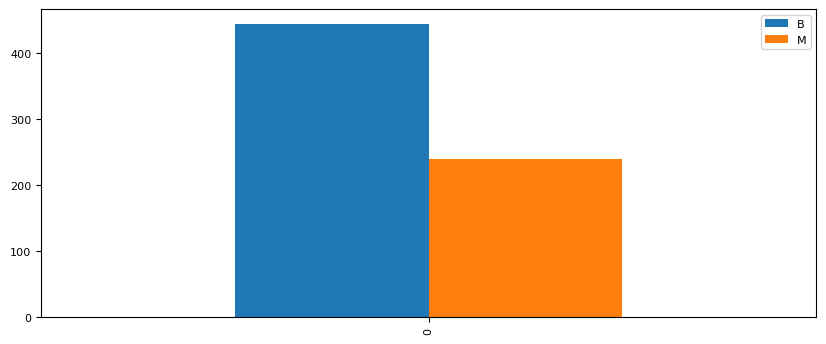

In [71]:
#simple histogram to show the number of samples that are benign or malignant

data_B = data[data['Class'] == 2]
data_M = data[data['Class'] == 4]
B_M_data = {'B': [data_B.shape[0]], 'M': [data_M.shape[0]]}
B_M_df = pd.DataFrame(data=B_M_data)
B_M_df.plot(kind='bar', figsize=(10,4))

#we can see there are roughly 2/3 benign (not harmful) and 1/3 malignant (cancerous)

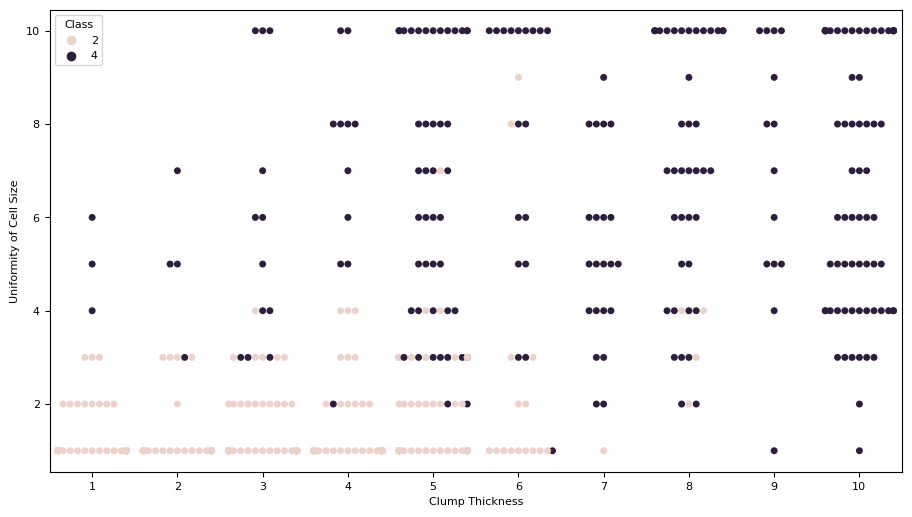

In [77]:
#swarmplot

f=plt.figure(figsize=(11,6))
sns.swarmplot(x=data['Clump Thickness'], y=data['Uniformity of Cell Size'], hue=data['Class'])
plt.show()

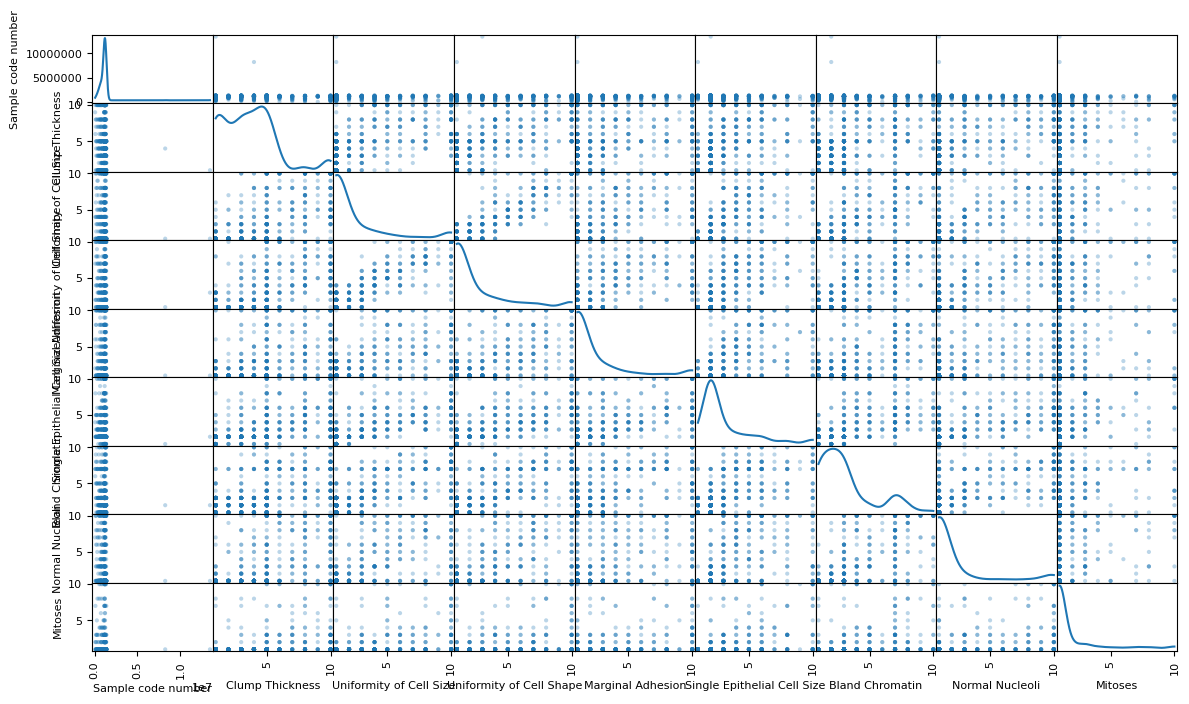

In [73]:
#to check for skewness

diagnosis = data['Class']
features = data.drop(['Class'], axis = 1)
pd.plotting.scatter_matrix(features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [74]:
# Contingency Table (frequency table)
# this table is used to summarise the relationship between two variables
# we will compare clump thickness for benign and malignant tumors
# very quickly we can see malignant cases increase with clump thinkness

pd.crosstab(index=data['Class'], columns=data['Clump Thickness'], margins=True)

Clump Thickness,1,2,3,4,5,6,7,8,9,10,All
Class,,,,,,,,,,,
2,136,46,92,67,83,15,1,4,0,0,444
4,3,4,12,12,45,18,22,40,14,69,239
All,139,50,104,79,128,33,23,44,14,69,683


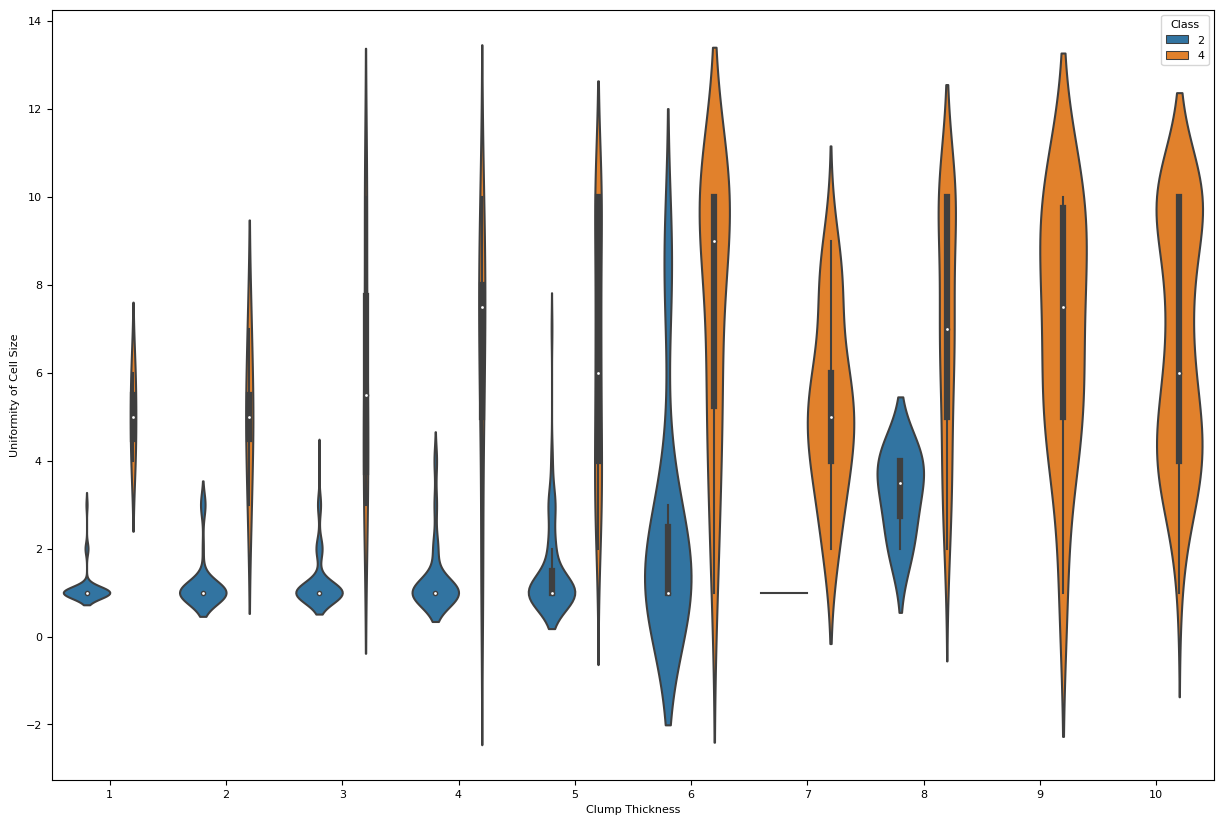

In [82]:
#violinplot

f=plt.figure(figsize=(15,10))
sns.violinplot(x=data['Clump Thickness'], y=data['Uniformity of Cell Size'], hue=data['Class'])
plt.show()

****
### Statistical Analysis Findings


In [ ]:
#Comparing Machine Learning Algorithms (MLAs) are important to come out with the best-suited algorithm for a particular problem.

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter to remove FutureWarning message


# Creating variables for analysis
x=data.iloc[:,:-1].values
y=data['Class']

# Splitting train and split data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=50)

# Application of all Machine Learning methods
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


We can see that the best accuracy for our data set is found with K Nearest Neighbour (KNN) at 96.5% and the Support Vector Machine algorithm (SVM) at 96.7%. The lowest accuracy is the Classification and Regresssion Tree (CART) algorithm at 94.5%.
 

